In [32]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt, sin, cos
from random import gauss, sample, choice

# Visualisierung des Datensatzes

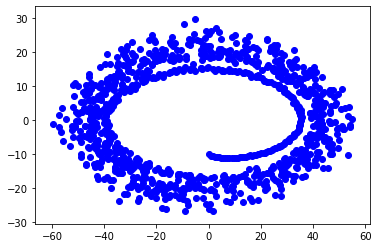

In [49]:
dataset = []
for u in np.arange(0, 50.05, 0.05):
    x = 3 * (10 + sqrt(u)) * sin(0.5*u) + gauss(0, 0.1*u)
    y = -2 * (5 + sqrt(u)) * cos(0.5*u) + gauss(0, 0.05 * u)
    dataset.append(np.array([x,y]))
    plt.scatter(x, y, color='blue')

# Initialisierung des Self-Organizing-Maps

In [50]:
class SelfOrganizingMap():

    def __init__(self, grid):
        self.grid = grid

    @classmethod
    def from_dataset(cls, dataset, size):
        return cls(sample(dataset, size))

    def _distance(self, input, unit_pos):
        return np.linalg.norm(input - unit_pos)

    def get_winner(self, input):
        distances = [self._distance(input, unit) for unit in self.grid]
        return np.argmin(distances)

    def train(self, input, learning_rate, update_range):
        def range_function(p1, p2):
            d = abs(p1 - p2)
            y = (-1 / update_range) * d + 1
            return max(0, min(1, y))

        w = self.get_winner(input)
        for i in range(len(self.grid)):
            self.grid[i] += learning_rate * (input - self.grid[i]) * range_function(w, i)


#Funktion zur Visualisierung der Datenpunkte und Gewinner-Units            
def plot(dataset, grid):
    plt.scatter(*zip(*dataset), c='b')
    if grid is not None:
        plt.plot(*zip(*grid), '-o', c='r')
        plt.grid()

Visualisierung der Lage der SOM-Units mit 50 Units mit zufälligen Elementen der Datenmenge

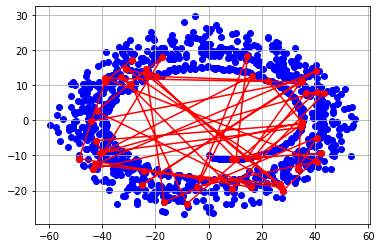

In [51]:
som = SelfOrganizingMap.from_dataset(dataset, 50)
plot(dataset, som.grid)

# Visualisierung der Gewinner-Units für die Datenpunkte mit Index [100,200,...,1000]

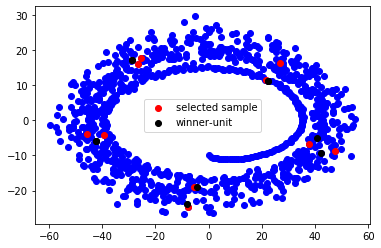

In [52]:
data = []
winning_units = []
for i in range(100, 1001, 100):
    data.append(dataset[i])
    w = som.get_winner(dataset[i])
    winning_units.append(som.grid[w])

plt.scatter(*zip(*dataset), c='b')
plt.scatter(*zip(*data), c='r', label = "selected sample")
plt.scatter(*zip(*winning_units), c='black', label = "winner-unit")
plt.legend()

# Training des SOMs

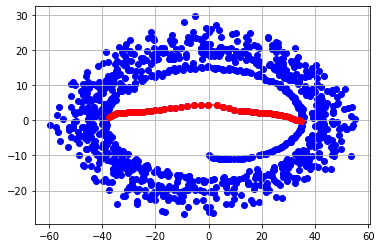

In [63]:
update_range = 25
learning_rate = 0.1
epochs = 500
for i in range(epochs):        
    som.train(choice(dataset), learning_rate, update_range)
    
plot(dataset, som.grid)

# Visualisierung der Gewinner-Units Werte für alle Datenpunkte

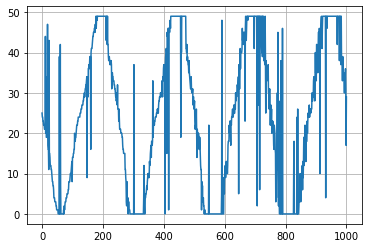

In [64]:
winners = [som.get_winner(input) for input in dataset]
plt.plot(winners)
plt.grid()